# Package Assignment to Drivers

Suppose we have customer locations and many drivers to do the delivery, we would like to assign these packages to our drivers. We modify the k-means clustering method to consider more factors that might affect the package assignment for delivery. 

## Contents.

- [ 1 - Simple Case: no restriction on drivers](#1)
- [ 2 - More Factors to Consider: drivers' delivery abilities](#2)
- [ 3 - Compare Assignment Results: weighted and unweighted](#3)
- [ 4 - Delivery Abilities restricted by Package Weights](#4)
- [ 5 - Further Analysis on Drivers' Delivery Abilities](#5)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'data.csv')

In [3]:
print(data.shape)
data.head(10)

(500, 7)


,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_gm
0,ORDC01406,140.80,12.9766,77.5993,8.335,13.700428,818.2
1,ORDZ10125,313.50,12.9770,77.5773,7.536,6.167473,960.0
2,ORDZ04175,714.00,12.9551,77.6593,9.860,15.088928,1255.5
3,ORDI03691,480.25,12.9473,77.5616,8.614,13.684368,757.5
4,ORDZ04094,497.75,12.9850,77.5533,8.802,13.760744,381.0
5,ORDB10193,664.50,12.9299,77.6848,9.081,13.387529,639.0
6,ORDX00958,413.40,12.9770,77.5773,6.412,12.007878,1041.0
7,ORDI03630,998.50,12.9828,77.6131,7.759,16.251402,441.0
8,ORDI05755,146.25,12.9766,77.5993,8.996,14.114691,738.5
9,ORDZ08573,417.25,12.9854,77.7081,8.624,15.758749,681.8


Take a look at how these locations are distributed

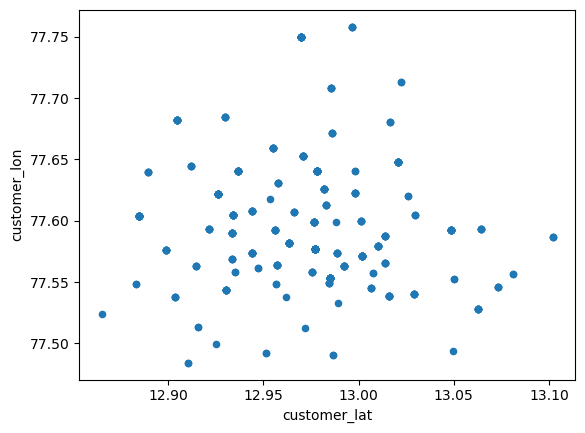

In [4]:
df = pd.DataFrame(data)
ax = df.plot.scatter(x='customer_lat', y='customer_lon')

<a name="1"></a>
## 1. Simple Case: no restriction on drivers

Drivers have no difference, we just partition the delivery locations into several areas. Each driver will deliver packages in a corresponding area.

In the following, assume we have K number of drivers, we will use k-means clustering method to assign packages to these drivers depending on the locations. 

First, we define some functions useful for the k-means clustering. We may simply use functions from Scikit learn for this simple case. However, we would like to deal with more complicated case later, we could easily modify these functions for our purposes. 

Define a function to get the locations closest to the initial location centers

In [5]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        normset = []
        for j in range(K):
            norm = np.dot(X[i]-centroids[j],X[i]-centroids[j])
            normset.append(norm)
        idx[i] = np.argmin(normset)
        
    return idx

Define a function to calculate the means of the locations assigned to a driver

In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    centroids = np.zeros((K, n))
    for j in range(K):
        points =X[idx==j]
        centroids[j] = np.mean(points, axis=0)
    
    return centroids

k-means clustering to assign items to drivers

In [7]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    
    return centroids, idx

In the beginning, we randomly choose center of locations for each driver

In [8]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

Partition the packages using k-means clustering

In [9]:
K = 6 #number of drivers
max_iters = 20
X = np.array(df[['customer_lat','customer_lon']])

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)

K-Means iteration 0/19
K-Means iteration 1/19
K-Means iteration 2/19
K-Means iteration 3/19
K-Means iteration 4/19
K-Means iteration 5/19
K-Means iteration 6/19
K-Means iteration 7/19
K-Means iteration 8/19
K-Means iteration 9/19
K-Means iteration 10/19
K-Means iteration 11/19
K-Means iteration 12/19
K-Means iteration 13/19
K-Means iteration 14/19
K-Means iteration 15/19
K-Means iteration 16/19
K-Means iteration 17/19
K-Means iteration 18/19
K-Means iteration 19/19


Add the classification index to the dataset

In [10]:
df['drivers'] = idx

In [11]:
df.head(10)

,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_gm,drivers
0,ORDC01406,140.80,12.9766,77.5993,8.335,13.700428,818.2,3
1,ORDZ10125,313.50,12.9770,77.5773,7.536,6.167473,960.0,3
2,ORDZ04175,714.00,12.9551,77.6593,9.860,15.088928,1255.5,2
3,ORDI03691,480.25,12.9473,77.5616,8.614,13.684368,757.5,3
4,ORDZ04094,497.75,12.9850,77.5533,8.802,13.760744,381.0,4
5,ORDB10193,664.50,12.9299,77.6848,9.081,13.387529,639.0,2
6,ORDX00958,413.40,12.9770,77.5773,6.412,12.007878,1041.0,3
7,ORDI03630,998.50,12.9828,77.6131,7.759,16.251402,441.0,5
8,ORDI05755,146.25,12.9766,77.5993,8.996,14.114691,738.5,3
9,ORDZ08573,417.25,12.9854,77.7081,8.624,15.758749,681.8,2


Plot the locations assigned to each driver

<Axes: xlabel='customer_lat', ylabel='customer_lon'>

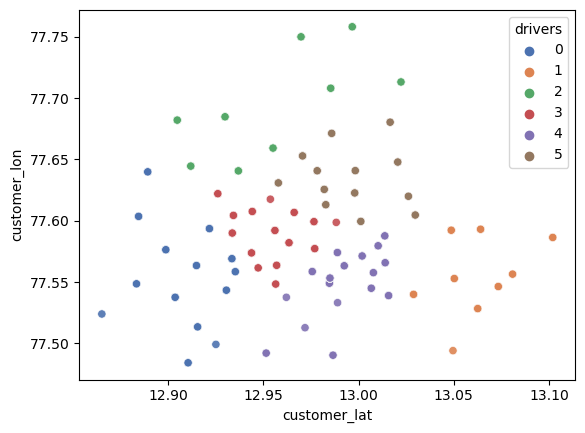

In [12]:
sns.scatterplot(data=df, x=df['customer_lat'], y=df['customer_lon'], alpha=0.9, hue=df['drivers'], palette="deep")

<a name="2"></a>
## 2. More Factors to Consider: drivers' delivery abilities


These drivers have different delivery experiences, so we need to modify the assignments to match their abilities.

For example, some drivers can deliver packages quickly in a larger area, but some others can only deliver in a smaller area using the same time. In particular, if driver A has delivery abilities twice as driver B, then we may assign A a larger area. 

Hence, when we assign the packages to each driver, we need to modify the function "find_closest_centroids()" using certain weights according to the ability of different drivers. 

We use numbers to represent the delivery ability of each driver. Suppose we have K=3 drivers, then the weights may look like 
                            
                                             [30,10,20]
                            
which means the first one has the largest delivery ability, the second one is the lowest.  

Since we don't have real data for drivers, we just randomly generate a weight sequence for our drivers to do the experiment. 

In [13]:
driver_abilities = np.random.randint(10, 100, size=K)

Now we use the following modified function to include drivers' delivery ability. If a driver has larger ability, then the location becomes closer to him/her in some sense. Thus we divide the distance by the ability. Here is just an example. One may use other relations with similar properties depending on real situations. 

In [14]:
def find_weighted_closest_centroids(X, centroids, driver_abilities):
    """
    Computes the centroid memberships for every example combining with drivers' abilities
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
        driver_abilities: K numbers
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    
    for i in range(X.shape[0]):
        normset = []
        for j in range(K):
            norm = np.dot(X[i]-centroids[j],X[i]-centroids[j])
            normset.append(norm/driver_abilities[j])  # if a driver has larger ability, then the location becomes closer to him/her. Thus we divide the distance by the ability. Here is just an example. One may use other relations with similar properties. 
        idx[i] = np.argmin(normset)
        
    return idx

Then we modify the k-means algorithm.

In [15]:
def run_weighted_kMeans(X, initial_centroids, driver_abilities, max_iters=10):
    """
    Runs the weighted K-Means algorithm with drivers' abilities on data matrix X, where each row of X
    is a single example
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)

    for i in range(max_iters):
        print("weighted K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_weighted_closest_centroids(X, centroids, driver_abilities)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    
    return centroids, idx

In [16]:
K = 6 #number of drivers
max_iters = 20
X = np.array(df[['customer_lat','customer_lon']])

# Set initial centroids by picking random examples from the dataset
#initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
weighted_centroids, weighted_idx = run_weighted_kMeans(X, initial_centroids, driver_abilities, max_iters)

weighted K-Means iteration 0/19
weighted K-Means iteration 1/19
weighted K-Means iteration 2/19
weighted K-Means iteration 3/19
weighted K-Means iteration 4/19
weighted K-Means iteration 5/19
weighted K-Means iteration 6/19
weighted K-Means iteration 7/19
weighted K-Means iteration 8/19
weighted K-Means iteration 9/19
weighted K-Means iteration 10/19
weighted K-Means iteration 11/19
weighted K-Means iteration 12/19
weighted K-Means iteration 13/19
weighted K-Means iteration 14/19
weighted K-Means iteration 15/19
weighted K-Means iteration 16/19
weighted K-Means iteration 17/19
weighted K-Means iteration 18/19
weighted K-Means iteration 19/19


In [17]:
df_weighted = df.drop(columns=['drivers'])
df_weighted['weighted drivers'] = weighted_idx

In [18]:
df_weighted.head(5)

,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_gm,weighted drivers
0,ORDC01406,140.80,12.9766,77.5993,8.335,13.700428,818.2,3
1,ORDZ10125,313.50,12.9770,77.5773,7.536,6.167473,960.0,3
2,ORDZ04175,714.00,12.9551,77.6593,9.860,15.088928,1255.5,2
3,ORDI03691,480.25,12.9473,77.5616,8.614,13.684368,757.5,3
4,ORDZ04094,497.75,12.9850,77.5533,8.802,13.760744,381.0,4


<Axes: xlabel='customer_lat', ylabel='customer_lon'>

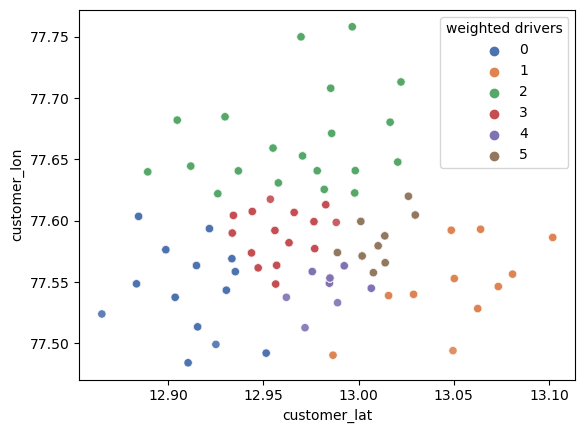

In [19]:
sns.scatterplot(data=df_weighted, x=df_weighted['customer_lat'], y=df_weighted['customer_lon'], alpha=0.9, hue=df_weighted['weighted drivers'], palette="deep")

In [20]:
driver_abilities

array([71, 88, 79, 56, 27, 44])

We find the person with largest and lowest ability number. 

In [21]:
Max_driver = np.argmax(driver_abilities)
Min_driver = np.argmin(driver_abilities)
print("The driver with largest delivery ability is:", Max_driver)
print("The driver with lowest delivery ability is:", Min_driver)

The driver with largest delivery ability is: 1
The driver with lowest delivery ability is: 4


<a name="3"></a>
## 3. Compare Assignment Results: weighted and unweighted
Now we put these two versions together and compare the assignment results. 

K-Means iteration 0/19
K-Means iteration 1/19
K-Means iteration 2/19
K-Means iteration 3/19
K-Means iteration 4/19
K-Means iteration 5/19
K-Means iteration 6/19
K-Means iteration 7/19
K-Means iteration 8/19
K-Means iteration 9/19
K-Means iteration 10/19
K-Means iteration 11/19
K-Means iteration 12/19
K-Means iteration 13/19
K-Means iteration 14/19
K-Means iteration 15/19
K-Means iteration 16/19
K-Means iteration 17/19
K-Means iteration 18/19
K-Means iteration 19/19
weighted K-Means iteration 0/19
weighted K-Means iteration 1/19
weighted K-Means iteration 2/19
weighted K-Means iteration 3/19
weighted K-Means iteration 4/19
weighted K-Means iteration 5/19
weighted K-Means iteration 6/19
weighted K-Means iteration 7/19
weighted K-Means iteration 8/19
weighted K-Means iteration 9/19
weighted K-Means iteration 10/19
weighted K-Means iteration 11/19
weighted K-Means iteration 12/19
weighted K-Means iteration 13/19
weighted K-Means iteration 14/19
weighted K-Means iteration 15/19
weighted K-M

Text(0.5, 1.0, 'Weighted assignment')

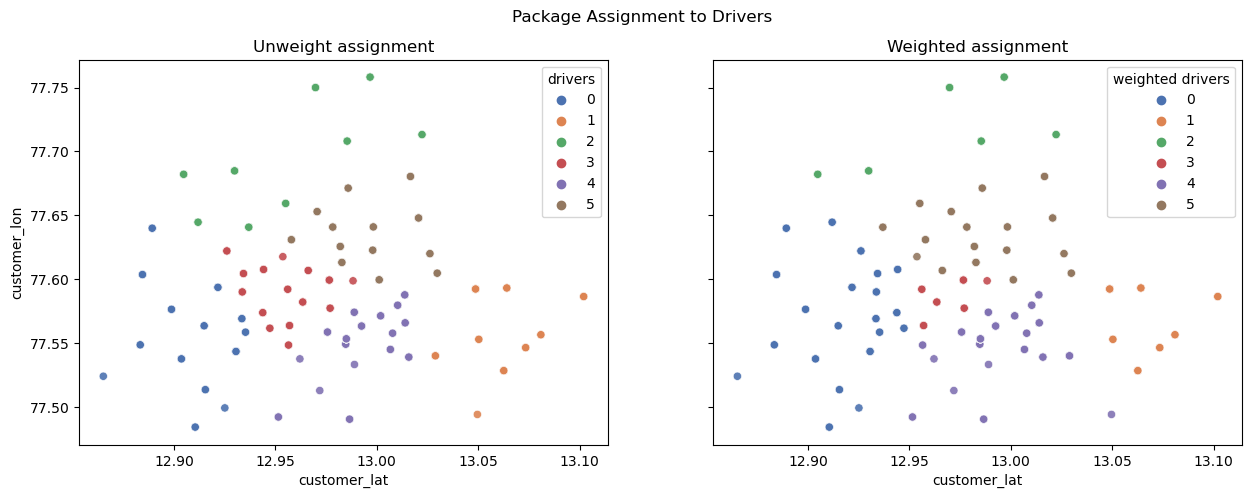

In [22]:
K = 6 #number of drivers
max_iters = 20
df_compare = pd.DataFrame(data)
X = np.array(df_compare[['customer_lat','customer_lon']])

# Set initial centroids by picking random examples from the dataset
#initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)
df_compare['drivers'] = idx

# Run weighted version with drivers' abilitites
driver_abilities = np.random.randint(10, 100, size=K)
weighted_centroids, weighted_idx = run_weighted_kMeans(X, initial_centroids, driver_abilities, max_iters)
df_compare['weighted drivers'] = weighted_idx

# Draw graphs with these two versions
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Package Assignment to Drivers')

# Unweighed version
sns.scatterplot(ax=axes[0], data=df_compare, x=df_compare['customer_lat'], y=df_compare['customer_lon'], alpha=0.9, hue=df_compare['drivers'], palette="deep")
axes[0].set_title('Unweight assignment')

# Weighted version
sns.scatterplot(ax=axes[1], data=df_compare, x=df_compare['customer_lat'], y=df_compare['customer_lon'], alpha=0.9, hue=df_compare['weighted drivers'], palette="deep")
axes[1].set_title('Weighted assignment')


In [23]:
driver_abilities

array([60, 36, 52, 25, 52, 61])

In [24]:
Max_driver = np.argmax(driver_abilities)
Min_driver = np.argmin(driver_abilities)
print("The driver with largest delivery ability is:", Max_driver)
print("The driver with lowest delivery ability is:", Min_driver)

The driver with largest delivery ability is: 5
The driver with lowest delivery ability is: 3


<a name="4"></a>
## 4. Delivery Abilities restricted by Package Weights

Now we modify our model again by including the package weights. For convenience of the presentation, we assume each driver could deliver same amount of weights of packages. So in the beginning, they all have the same delivery ability. But when a driver already chooses a very heavy package, his/her remaining delivery abiltiy decreases. Later when we assign another package, the distribution of drivers' delivery abilities changed. We will tend to assign another heavy package to other drivers. Therefore, in the "find_closest_centroids()" function, we need to update the drivers' delivery ability for each iteration step on the locations. 

For this case, we may choose different measures to select a proper driver for each package. Here I just use

                               (Pakcage Weight assigned to a driver) * (Distance)
                               
as a measure to control the selection process. It makes sense, since when a person carrys a heavier package, this person can only walk a smaller distance. 

After this modification, we will see later (in Power BI with nicer visulizations) that the total weights assigned to each driver are more evenly distributed than the other two cases. Therefore, it avoids other possbile problems, e.g. overweighted truck, driver works overtime, which means less maintanence and cost. 

Below we give the modified function. I call it a "Balanced Version". 

In [25]:
def find_balanced_closest_centroids(X, centroids, package_weights):
    """
    Computes the centroid memberships for every example combining with drivers' abilities
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
        package_weights: m values
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    weight_to_driver = np.empty(K) # to record package weights assigned to each driver
    total_weights = np.sum(package_weights) # total weights of packages to deliver
    weight_to_driver.fill(1) # initialize a positive number, zero is not convenient for the following calculation
    driver_abilities = np.empty(K)
    driver_abilities.fill(total_weights) # initialize the deliver abilitites using total_weights
    
    for i in range(X.shape[0]):
        normset = []
        for j in range(K):
            norm = np.dot(X[i]-centroids[j],X[i]-centroids[j])
            normset.append(norm*(weight_to_driver[j]))  # Here we use weight*distance as a measure (since people carrying more weights can only travel smaller distances)
        idx[i] = np.argmin(normset)
        driver = idx[i]
        # add the package to driver
        weight_to_driver[driver] += package_weights[i]
        # update the corresponding driver's delivery ability
        driver_abilities[driver] = total_weights-weight_to_driver[driver]

    return idx

Then we also update the run_kMeans() function.

In [26]:
def run_balanced_kMeans(X, initial_centroids, package_weights, max_iters=10):
    """
    Runs the balanced K-Means algorithm with drivers' abilities on data matrix X, where each row of X
    is a single example
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)

    for i in range(max_iters):
        print("balanced K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_balanced_closest_centroids(X, centroids, package_weights)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    
    return centroids, idx

In [27]:
package_weights = df_compare['weight_in_gm']
balanced_centroids, balanced_idx = run_balanced_kMeans(X, initial_centroids, package_weights, max_iters)
df_compare['balanced drivers'] = balanced_idx
df_compare.head(20)

balanced K-Means iteration 0/19
balanced K-Means iteration 1/19
balanced K-Means iteration 2/19
balanced K-Means iteration 3/19
balanced K-Means iteration 4/19
balanced K-Means iteration 5/19
balanced K-Means iteration 6/19
balanced K-Means iteration 7/19
balanced K-Means iteration 8/19
balanced K-Means iteration 9/19
balanced K-Means iteration 10/19
balanced K-Means iteration 11/19
balanced K-Means iteration 12/19
balanced K-Means iteration 13/19
balanced K-Means iteration 14/19
balanced K-Means iteration 15/19
balanced K-Means iteration 16/19
balanced K-Means iteration 17/19
balanced K-Means iteration 18/19
balanced K-Means iteration 19/19


,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_gm,drivers,weighted drivers,balanced drivers
0,ORDC01406,140.80,12.9766,77.5993,8.335,13.700428,818.2,3,3,3
1,ORDZ10125,313.50,12.9770,77.5773,7.536,6.167473,960.0,3,3,5
2,ORDZ04175,714.00,12.9551,77.6593,9.860,15.088928,1255.5,2,5,4
3,ORDI03691,480.25,12.9473,77.5616,8.614,13.684368,757.5,3,0,0
4,ORDZ04094,497.75,12.9850,77.5533,8.802,13.760744,381.0,4,4,1
5,ORDB10193,664.50,12.9299,77.6848,9.081,13.387529,639.0,2,2,2
6,ORDX00958,413.40,12.9770,77.5773,6.412,12.007878,1041.0,3,3,3
7,ORDI03630,998.50,12.9828,77.6131,7.759,16.251402,441.0,5,5,1
8,ORDI05755,146.25,12.9766,77.5993,8.996,14.114691,738.5,3,3,3
9,ORDZ08573,417.25,12.9854,77.7081,8.624,15.758749,681.8,2,2,4


Now We compare all three versions above. 

Text(0.5, 1.0, 'Balanced assignment')

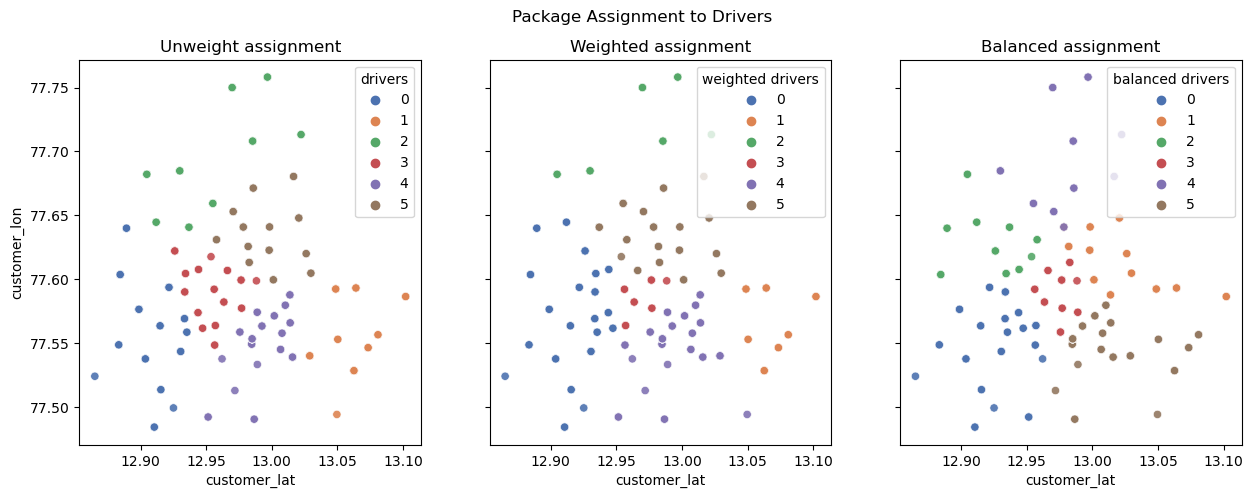

In [28]:
# Draw graphs with these three versions
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Package Assignment to Drivers')

# Unweighed version
sns.scatterplot(ax=axes[0], data=df_compare, x=df_compare['customer_lat'], y=df_compare['customer_lon'], alpha=0.9, hue=df_compare['drivers'], palette="deep")
axes[0].set_title('Unweight assignment')

# Weighted version
sns.scatterplot(ax=axes[1], data=df_compare, x=df_compare['customer_lat'], y=df_compare['customer_lon'], alpha=0.9, hue=df_compare['weighted drivers'], palette="deep")
axes[1].set_title('Weighted assignment')

# Balanced version
sns.scatterplot(ax=axes[2], data=df_compare, x=df_compare['customer_lat'], y=df_compare['customer_lon'], alpha=0.9, hue=df_compare['balanced drivers'], palette="deep")
axes[2].set_title('Balanced assignment')


<a name="5"></a>
## 5. Further Analysis on Drivers' Delivery Abilities

Drivers' delivery abilities may depend on many other factors, such as safety-driving, types of trucks, weather and road conditions. In the above experimental model, I only considered a simplied version. In real situations, we may consider more factors. 

In a separate notebook, I will use neural networks to analyze the drivers' delivery abilites depending on various factors. 

In [30]:
df_compare.to_csv('PackageAssignment.csv')